# Linear Regression
## Introduction
I'm using this notebook as a means to serve my own understanding for linear regressors. Hopefully, it is a useful find for anyone who is looking to understand these models as well. 

## Key idea
Linear regressors are a great way to model a linear relationship between two or more variables. In other words, we are attempting to derive a function for a straight line which most accurately captures the relationship between two or more sets of data. Linear regressors offer a mathematically rigorous approach to finding this 'best fit' line. 

## Mathematics of linear regression in 2D space
We know that a 2D line can be described using the equation

$y = mx + b$

* y = y coordinate 
* m = slope 
* x = x coordinate
* b = y intercept

The goal is to arrive at a value of m and b that best fits our data, (in this case, we are assuming two variables). In other words, we must **minimize the distances between the data points and the predicted line.**
We can formulate this as a simple optimization problem: 

For what values of $m$ and $b$ does $\sum \limits _{i=1} ^{n} (y_{i} - (mx_{i} + b)) ^2$ become the smallest possible value? Here, $y_{i}$ is the i'th data points y value, and $mx_{i} + b$ represents the predicted y value. The sum term is simply adding up all of the squared y distances between each predicted point, and actual data point. 

The above equation is called the *square error*, and typically in this kind of an optimization problem, we also throw in a $1/n$ term, which just changes the expression to a *mean square error* i.e\
$Error_{mse} = (1/n)\sum \limits _{i=1}^{n} (y_{i} - (mx_{i} + b)) ^2$

We can use **partial derivaties** to compute the slop of this error function with respect to $m$ and $b$. This is useful because it gives us an idea of what *direction* to nudge the variables in to get a smaller error. 

$\frac{\partial E}{\partial m} = (1/n)\sum \limits _{i=1}^{n} (2)(y_{i} - (mx_{i} + b))(-x_{i})$\
$\frac{\partial E}{\partial b} = (1/n)\sum \limits _{i=1}^{n} (2)(y_{i} - (mx_{i} + b))(-1)$

In essence, each partial derivative describes the slope of the error function. We can use this to update our variables to values that will reduce this error function:

$m = m -(L)\frac{\partial E}{\partial m}$\
$b = b -(L)\frac{\partial b}{\partial m}$

Here, $L$ is a constant called the **Learning rate**. It can be tuned to modify how big of an update is made to each of the variables in our hunt for the error functions minimum value. Notice we are *subtracting* the partial derivative, because the partial derivative by itself gives us the steepest *ascent*, (change that most greatly *increases* the error function.) We want to go in the opposite direction.

The idea here is to **iteratively update our m and b values** until we reach some kind of minima. We could check for convergence by inspecting how much the mean squared error changes per update. If we find that the error is barely moving after many updates, we can conclude that we have reached a minima. In 2D linear regressor models, this is usually the global minima. 

## Dataset for demonstration
I decided to use a fish market dataset which catalogues the weight, lengths and prices of various fish species: 

https://www.kaggle.com/aungpyaeap/fish-market

I think as a starting exercise it would be interesting to try and model the relationship between the weight and vertical length of the Perch fish species. 



In [58]:
from matplotlib import pyplot as plt
import pandas as pd

# Load the fish dataset
fish_data = pd.read_csv("/Users/srujanvajram/Documents/Github/ML_playground/ML_playground/linear_regression/Fish.csv")

# Index the pandas dataframes for Perch weight and height
mask = fish_data['Species'] == 'Perch'
perch_data = fish_data[mask]
perch_weight = perch_data['Weight'].values
perch_height = perch_data['Height'].values 

# We first scale the data by dividing with the largest observed value
# This has significant implications for our model down the line
perch_weight = perch_weight/max(perch_weight)
perch_height = perch_height/max(perch_height)

Text(0, 0.5, 'Scaled Height')

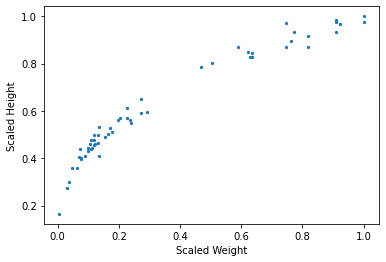

In [61]:
# Plot the scaled weights and heights as a scatter plot
plt.scatter(perch_weight,perch_height, s=5)
plt.xlabel("Scaled Weight")
plt.ylabel("Scaled Height")

## First impressions
This is pretty interesting distribution. From initial inspection I can already tell this not quite a linear relationship (a logarithmic curve would fit this much better) but for the purpose of this exercise, lets see how good of a linear fit we can model.  

## Updating the variables (Gradient Descent)
The process of updating the variables in the direction of steepest descent is called **gradient descent.** We compose a function to update our variables.

In [62]:
def gradient_descent(m,b,x,y,L):
    
    # Compute predictions
    predictions = m*x + b
    # Compute the gradient of the loss for all predicted points 
    m_grad = (-2/len(x)) * sum(  (y -(predictions)) * x )
    b_grad = (-2/len(x)) * sum(  (y -(predictions)) )
        
    m_new = m - L*(m_grad)
    b_new = b - L*(b_grad)
    
    return m_new, b_new

## Running gradient descent 
Now that we have composed the gradient descent function, we simply need to update our variables many times. This lets us reach an iteratively smaller and smaller loss. For this exercise, were running our descent function an arbitrary number of times. I've chosen 1000, though you could very much have chosen 100, or 10,000. The more number of iterations, the more confident you can be that we have reached a minima in the loss function, the caveat being it takes longer to run. Each interation and subsequent update is called an **epoch**. We run gradient descent for 1000 epochs. 

## The importance of scaling
It is important we scaled our data prior to gradient descent. Vastly different scales across variables can cause instability when computing gradient descent, and lead to an 'exploding' or 'vanishing' gradient where the computed slopes are too large or too small. For instance, if fish weight was recorded in milligrams (values ranging in the tens of thousands), whereas height was in cm (vales ranging in the hundreds) our computed gradients would be incredibly large or small due to the way the data is distributed. As such, it is essential we scale the data down so that the feature spaces are comprable in range. 

In [1]:
# Initializing starting values 
m = 0
b = 0
L = 0.01
epochs = 1000

# Run for 1000 epochs
for i in range(epochs): 
    # Notice how we update m and b, but 
    # then use the same values of m and b in the next gradient descent call
    m, b = gradient_descent(m,b,perch_weight,perch_height,L)
    
# # Finally, plot the original data, and the line predicted using our linear regression model: 
linear_model = m*perch_weight + b
# Plot the scaled weights and heights as a scatter plot
plt.scatter(perch_weight,perch_height, s=5)
plt.xlabel("Scaled Weight")
plt.ylabel("Scaled Height")
plt.plot(perch_weight, model)

NameError: name 'gradient_descent' is not defined